# **Cat vs Dog Image Classification using CNN (VGG16)**

# Import Libraries

In [1]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



**Data Visualization**

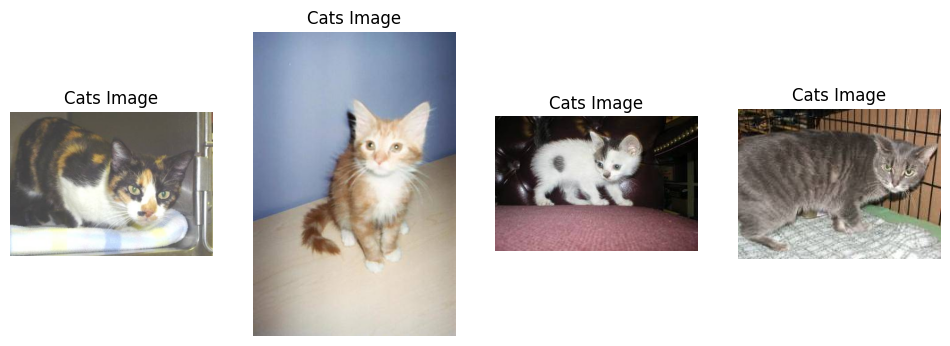

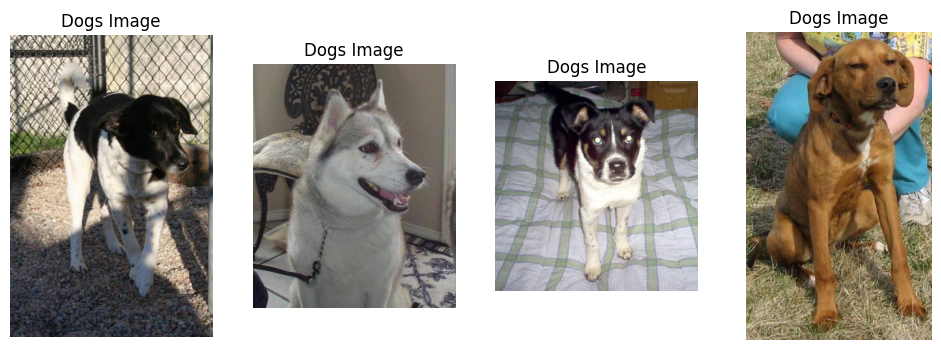

In [2]:
def visualize_random_images(base_dir, category, num_images=3):
    category_dir = os.path.join(base_dir, category)
    image_files = random.sample(os.listdir(category_dir), num_images)

    plt.figure(figsize=(12, 4))
    for i, image_file in enumerate(image_files, 1):
        img_path = os.path.join(category_dir, image_file)
        plt.subplot(1, num_images, i)
        plt.imshow(mpimg.imread(img_path))
        plt.axis('off')
        plt.title(f"{category.capitalize()} Image")

    plt.show()

train_dir = "/kaggle/input/dog-vs-cat-fastai/dogscats/train"
visualize_random_images(train_dir, 'cats', num_images=4)
visualize_random_images(train_dir, 'dogs', num_images=4)

**Data Augmentation**

In [3]:
from tensorflow.keras.applications.vgg16 import preprocess_input

#  image generator
train_datagenerator=ImageDataGenerator(preprocessing_function=preprocess_input,
                                      rotation_range=20,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True )

# Set data processing requirements for training data
train_data= train_datagenerator.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb'

)

# Set data processing requirements for testing data
test_path='/kaggle/input/dog-vs-cat-fastai/dogscats/valid'
test_datagenerator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_data = test_datagenerator.flow_from_directory(test_path,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                color_mode='rgb')



Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


**Used Pretrained Model ( VGG16 )**

In [4]:
from tensorflow.keras.models import Model, Sequential

# Skip dense layer
model=VGG16(include_top=False,input_shape=(224,224,3))

# for freeze convolutional layers in VGG16 means not updated weight during processing
for layers in model.layers:
    layers.trainable=False

#  add custom dense layers according to your requirements

custom_model=Sequential()
custom_model.add(Flatten(input_shape=model.output_shape[1:]))
custom_model.add(Dense(256,activation='relu'))
custom_model.add(Dense(2,activation='sigmoid'))


# Create the final model by combining the base model and the custom head
VGG16_model = Model(inputs=model.input, outputs=custom_model(model.output))

# Compile the model
VGG16_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

print("MODEL SUCCESSFULLY COMPILED")

58889256/58889256 [==============================] - 3s 0us/step
MODEL SUCCESSFULLY COMPILED


**Measure Accuracy**

In [5]:
history = VGG16_model.fit(
    train_data,
    steps_per_epoch=train_data.samples // 32,
    epochs=1,
    validation_data=test_data,
    validation_steps=test_data.samples // 32
)


718/718 [==============================] - 6399s 9s/step - loss: 0.4208 - accuracy: 0.9532 - val_loss: 0.0661 - val_accuracy: 0.9783


# **Application Phase**

1/1 [==============================] - 0s 458ms/step


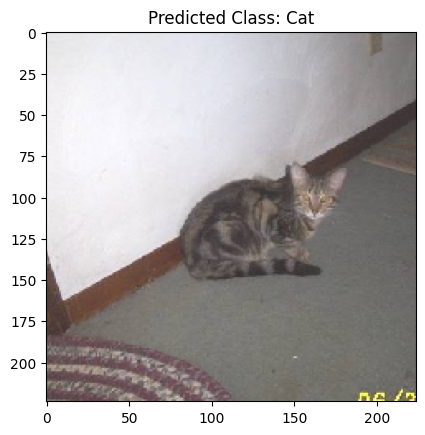

Predicted Class:  Cat
Prediction Probabilities:  [[0.9819453  0.02860171]]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model

# Load Image
img_path = "/kaggle/input/dog-vs-cat-fastai/dogscats/valid/cats/cat.10048.jpg"  
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = VGG16_model.predict(img_array)

class_labels = ['cats', 'dogs']
predicted_class_index = np.argmax(predictions)
predicted_class_label = "Cat" if class_labels[predicted_class_index] == 'cats' else "Dog"


# Display the image
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_label}")
plt.show()

# Print the predictions
print("Predicted Class: ", predicted_class_label)
print("Prediction Probabilities: ", predictions)
